# Ensemble Learning with Traditional ML Models

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import f1_score
import optuna

In [175]:
X_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_train.npy")
X_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_valid.npy")
y_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_train.npy")
y_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_valid.npy")
X_test = np.load("data/Regular_Processed/Without_Ordinal_Encoding/X_test.npy")

for arr in [X_train, X_valid, y_train, y_valid, X_test]:
    print(arr.shape)

(988, 66)
(247, 66)
(988,)
(247,)
(824, 66)


# Loading Traditional ML Models

### Random Forest

In [176]:
# Lazy Predict's Random Forest Classifier values
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=23, random_state=123, criterion='entropy', n_estimators=28)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 1.0
Valid F1 Score: 0.728744939271255


In [177]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_criterion = trial.suggest_categorical('rf_criterion', ['gini', 'entropy', 'log_loss'])
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 7, log=True)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 2, 50, log=True)
    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, random_state=123, criterion=rf_criterion)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score  # - abs((train_f1_score - valid_f1_score)/7)

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-04-14 17:20:36,683] A new study created in memory with name: no-name-eff59bed-5395-40f3-8f01-a7f7d2e26e33
[I 2024-04-14 17:20:36,701] Trial 0 finished with value: 0.6234817813765182 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 4, 'rf_n_estimators': 3}. Best is trial 0 with value: 0.6234817813765182.
[I 2024-04-14 17:20:36,729] Trial 1 finished with value: 0.6680161943319838 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 4, 'rf_n_estimators': 10}. Best is trial 1 with value: 0.6680161943319838.
[I 2024-04-14 17:20:36,774] Trial 2 finished with value: 0.6761133603238867 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 7, 'rf_n_estimators': 13}. Best is trial 2 with value: 0.6761133603238867.
[I 2024-04-14 17:20:36,791] Trial 3 finished with value: 0.6477732793522267 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 2, 'rf_n_estimators': 5}. Best is trial 2 with value: 0.6761133603238867.
[I 2024-04-14 17:20:36,855] Trial 4 finis

In [178]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.7125506072874493]
HyperParameters = {'rf_criterion': 'gini', 'rf_max_depth': 5, 'rf_n_estimators': 23}


In [179]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=123, criterion='gini', n_estimators=4)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7267206477732794
Valid F1 Score: 0.7206477732793523


### Bernoulli Naive Bayes

In [180]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)
train_preds = naive_bayes_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = naive_bayes_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6973684210526315
Valid F1 Score: 0.6680161943319838


### Nearest Centroid

In [181]:
from sklearn.neighbors import NearestCentroid

nearest_centroid_classifier = NearestCentroid(metric='correlation')
nearest_centroid_classifier.fit(X_train, y_train)
train_preds = nearest_centroid_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = nearest_centroid_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6589068825910931
Valid F1 Score: 0.6720647773279352


c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


In [182]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_metric = trial.suggest_categorical('rf_metric', ['hamming', 'cosine', 'euclidean', 'yule', 'russellrao', 'jaccard', 'chebyshev',
                                                        'sokalmichener', 'sqeuclidean', 'matching', 'rogerstanimoto', 'nan_euclidean',
                                                        'dice', 'sokalsneath', 'correlation', 'canberra', 'manhattan', 'braycurtis'])
    classifier_obj = NearestCentroid(metric=rf_metric)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-04-14 17:20:43,772] A new study created in memory with name: no-name-f2d2a1c8-8d2c-47e7-bc53-660294d8a27d
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\metrics\pairwise.py:2317: DataCo

In [183]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.6720647773279352]
HyperParameters = {'rf_metric': 'correlation'}


## XGBoost

In [184]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Create XGBoost classifier instance
bst = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='multi:softmax', num_class=3, random_state=123)

# Train the XGBoost model
bst.fit(X_train, y_train)

train_preds = bst.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = bst.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")


Train F1 Score: 0.9969635627530364
Valid F1 Score: 0.7004048582995951


In [185]:
import xgboost as xgb
from sklearn.model_selection import KFold
import optuna

def objective(trial):
    # Define XGBoost parameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }
    
    # Create XGBoost classifier instance with the specified parameters
    bst = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=123, **params)
    
    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    f1_scores = []
    
    for train_idx, valid_idx in kf.split(X_train):
        X_train_fold, X_valid_fold = X_train[train_idx], X_train[valid_idx]
        y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]
        
        bst.fit(X_train_fold, y_train_fold)
        valid_preds = bst.predict(X_valid_fold)
        f1_scores.append(f1_score(y_valid_fold, valid_preds, average='micro'))
    
    # Compute the average F1 score across all folds
    avg_f1_score = sum(f1_scores) / len(f1_scores)
    
    return avg_f1_score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best trial
best_trial = study.best_trial
print(f'Best Trial - F1 Score: {best_trial.value:.4f}')
print(f'Best Hyperparameters: {best_trial.params}')


[I 2024-04-14 17:20:44,908] A new study created in memory with name: no-name-0d416e9b-e6c7-4f38-80d0-2436f960b118
C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\1293846748.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-14 17:20:46,779] Trial 0 finished with value: 0.7003845562221197 and parameters: {'n_estimators': 153, 'max_depth': 7, 'learning_rate': 0.08216148029645541}. Best is trial 0 with value: 0.7003845562221197.
C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\1293846748.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_r

Best Trial - F1 Score: 0.7135
Best Hyperparameters: {'n_estimators': 110, 'max_depth': 3, 'learning_rate': 0.11846833545955368}


In [186]:
import xgboost as xgb
from sklearn.metrics import f1_score

# Create XGBoost classifier instance
bst = xgb.XGBClassifier(n_estimators=117, max_depth=4, learning_rate=0.25993, objective='multi:softmax', num_class=3, random_state=123)

# Train the XGBoost model
bst.fit(X_train, y_train)

train_preds = bst.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = bst.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")


Train F1 Score: 0.9959514170040485
Valid F1 Score: 0.7327935222672065


## LightBGM

In [187]:
import lightgbm as lgb
from sklearn.metrics import f1_score

# Create LightGBM classifier instance
lgb_classifier = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='multiclass',  # Use 'multiclass' for multi-class classification
    num_class=3,
    random_state=123
)

# Train the LightGBM model
lgb_classifier.fit(X_train, y_train)

# Make predictions on training and validation data
train_preds = lgb_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')

valid_preds = lgb_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [188]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import optuna

def objective(trial):
    # Define LightGBM parameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
    }
    
    # Create LightGBM classifier instance with the specified parameters
    lgb_classifier = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=123, **params)
    
    # Perform cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=123)
    f1_scores = []
    
    for train_idx, valid_idx in kf.split(X_train):
        X_train_fold, X_valid_fold = X_train[train_idx], X_train[valid_idx]
        y_train_fold, y_valid_fold = y_train[train_idx], y_train[valid_idx]
        
        lgb_classifier.fit(X_train_fold, y_train_fold)
        valid_preds = lgb_classifier.predict(X_valid_fold)
        f1_scores.append(f1_score(y_valid_fold, valid_preds, average='micro'))
    
    # Compute the average F1 score across all folds
    avg_f1_score = sum(f1_scores) / len(f1_scores)
    
    return avg_f1_score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best trial
best_trial = study.best_trial
print(f'Best Trial - F1 Score: {best_trial.value:.4f}')
print(f'Best Hyperparameters: {best_trial.params}')

[I 2024-04-14 17:21:40,324] A new study created in memory with name: no-name-a9a6034b-e764-4dc8-a5b4-4a05a98465cb


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:41,651] Trial 0 finished with value: 0.7033994770035379 and parameters: {'n_estimators': 180, 'max_depth': 7, 'learning_rate': 0.2379994574761204}. Best is trial 0 with value: 0.7033994770035379.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 791, number of used features: 57
[LightGBM] [Info] Start training from score -1.063826
[LightGBM] [Info] Start training from score -1.636345
[LightGBM] [Info] Start training from score -0.776144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:21:42,176] Trial 1 finished with value: 0.704465979592883 and parameters: {'n_estimators': 98, 'max_depth': 6, 'learning_rate': 0.05316301502775496}. Best is trial 1 with value: 0.704465979592883.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-14 17:21:42,381] Trial 2 finished with value: 0.6973542531918167 and parameters: {'n_estimators': 56, 'max_depth': 3, 'learning_rate': 0.056621331633567654}. Best is trial 1 with value: 0.704465979592883.
C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 secon

[I 2024-04-14 17:21:43,448] Trial 3 finished with value: 0.7064349074501359 and parameters: {'n_estimators': 159, 'max_depth': 9, 'learning_rate': 0.25602218247547914}. Best is trial 3 with value: 0.7064349074501359.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:43,985] Trial 4 finished with value: 0.7034251140850125 and parameters: {'n_estimators': 162, 'max_depth': 4, 'learning_rate': 0.060506049338315965}. Best is trial 3 with value: 0.7064349074501359.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.103688
[LightGBM] [Info] Start training from score -1.548069
[LightGBM] [Info] Start training from score -0.785929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-04-14 17:21:44,440] Trial 5 finished with value: 0.6912782648823258 and parameters: {'n_estimators': 158, 'max_depth': 3, 'learning_rate': 0.018739965979365784}. Best is trial 3 with value: 0.7064349074501359.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:44,821] Trial 6 finished with value: 0.7064400348664308 and parameters: {'n_estimators': 57, 'max_depth': 7, 'learning_rate': 0.17545076172692115}. Best is trial 6 with value: 0.7064400348664308.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-04-14 17:21:45,796] Trial 7 finished with value: 0.70541967902374 and parameters: {'n_estimators': 159, 'max_depth': 6, 'learning_rate': 0.18794576991955056}. Best is trial 6 with value: 0.7064400348664308.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sinc

[I 2024-04-14 17:21:46,560] Trial 8 finished with value: 0.6923242578064912 and parameters: {'n_estimators': 99, 'max_depth': 10, 'learning_rate': 0.026829727011264688}. Best is trial 6 with value: 0.7064400348664308.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:47,051] Trial 9 finished with value: 0.6680100497359381 and parameters: {'n_estimators': 69, 'max_depth': 7, 'learning_rate': 0.01186824483363806}. Best is trial 6 with value: 0.7064400348664308.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2024-04-14 17:21:47,753] Trial 10 finished with value: 0.6892221709480594 and parameters: {'n_estimators': 120, 'max_depth': 8, 'learning_rate': 0.4590585189128101}. Best is trial 6 with value: 0.7064400348664308.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 791, number of used features: 57
[LightGBM] [Info] Start training from score -1.063826
[LightGBM] [Info] Start training from score -1.636345
[LightGBM] [Info] Start training from score -0.776144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:48,797] Trial 11 finished with value: 0.7074603907091218 and parameters: {'n_estimators': 131, 'max_depth': 10, 'learning_rate': 0.15366436972026581}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:49,765] Trial 12 finished with value: 0.7034456237501923 and parameters: {'n_estimators': 125, 'max_depth': 10, 'learning_rate': 0.11544285746767562}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:50,179] Trial 13 finished with value: 0.7003794288058247 and parameters: {'n_estimators': 87, 'max_depth': 5, 'learning_rate': 0.12847296070601244}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:51,262] Trial 14 finished with value: 0.6993488181305441 and parameters: {'n_estimators': 198, 'max_depth': 8, 'learning_rate': 0.47264859977501694}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:52,275] Trial 15 finished with value: 0.6983643542019176 and parameters: {'n_estimators': 138, 'max_depth': 9, 'learning_rate': 0.10479911073612465}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:53,078] Trial 16 finished with value: 0.6983592267856227 and parameters: {'n_estimators': 109, 'max_depth': 8, 'learning_rate': 0.1954391825278504}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2024-04-14 17:21:53,862] Trial 17 finished with value: 0.6902425267907502 and parameters: {'n_estimators': 137, 'max_depth': 5, 'learning_rate': 0.30982476480816246}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:21:54,611] Trial 18 finished with value: 0.6882684715172026 and parameters: {'n_estimators': 76, 'max_depth': 9, 'learning_rate': 0.03798184356956287}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:21:55,256] Trial 19 finished with value: 0.6973593806081115 and parameters: {'n_estimators': 51, 'max_depth': 10, 'learning_rate': 0.09855739464183735}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_le

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:56,155] Trial 20 finished with value: 0.6983438445367378 and parameters: {'n_estimators': 142, 'max_depth': 5, 'learning_rate': 0.17431779647436474}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:21:57,511] Trial 21 finished with value: 0.6973132338614572 and parameters: {'n_estimators': 176, 'max_depth': 9, 'learning_rate': 0.30913553266794047}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:21:58,989] Trial 22 finished with value: 0.7023739937445522 and parameters: {'n_estimators': 146, 'max_depth': 9, 'learning_rate': 0.2781384160377536}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:00,073] Trial 23 finished with value: 0.6973439983592269 and parameters: {'n_estimators': 115, 'max_depth': 10, 'learning_rate': 0.16391280381973075}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 791, number of used features: 57
[LightGBM] [Info] Start training from score -1.063826
[LightGBM] [Info] Start training from score -1.636345
[LightGBM] [Info] Start training from score -0.776144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:22:01,336] Trial 24 finished with value: 0.6983592267856227 and parameters: {'n_estimators': 173, 'max_depth': 8, 'learning_rate': 0.08451209054034735}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[I 2024-04-14 17:22:02,598] Trial 25 finished with value: 0.704399323181049 and parameters: {'n_estimators': 194, 'max_depth': 7, 'learning_rate': 0.36155149817324234}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:22:03,674] Trial 26 finished with value: 0.6912680100497359 and parameters: {'n_estimators': 149, 'max_depth': 9, 'learning_rate': 0.14428185276200217}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 791, number of used features: 57
[LightGBM] [Info] Start training from score -1.063826
[LightGBM] [Info] Start training from score -1.636345
[LightGBM] [Info] Start training from score -0.776144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:22:04,800] Trial 27 finished with value: 0.689237553196944 and parameters: {'n_estimators': 129, 'max_depth': 10, 'learning_rate': 0.23180509552444198}. Best is trial 11 with value: 0.7074603907091218.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training fr

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:05,538] Trial 28 finished with value: 0.7125416602573964 and parameters: {'n_estimators': 99, 'max_depth': 8, 'learning_rate': 0.07516061619130993}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-04-14 17:22:06,086] Trial 29 finished with value: 0.6943342049941036 and parameters: {'n_estimators': 68, 'max_depth': 7, 'learning_rate': 0.07139205362202561}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 791, number of used features: 57
[LightGBM] [Info] Start training from score -1.063826
[LightGBM] [Info] Start training from score -1.636345
[LightGBM] [Info] Start training from score -0.776144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2024-04-14 17:22:06,712] Trial 30 finished with value: 0.6994154745423782 and parameters: {'n_estimators': 89, 'max_depth': 6, 'learning_rate': 0.0391646731506829}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2024-04-14 17:22:07,490] Trial 31 finished with value: 0.6943085679126288 and parameters: {'n_estimators': 105, 'max_depth': 8, 'learning_rate': 0.22626553867472696}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:08,079] Trial 32 finished with value: 0.692272983643542 and parameters: {'n_estimators': 85, 'max_depth': 9, 'learning_rate': 0.0865396839079317}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:22:08,584] Trial 33 finished with value: 0.7033994770035379 and parameters: {'n_estimators': 61, 'max_depth': 7, 'learning_rate': 0.136078072597565}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:09,677] Trial 34 finished with value: 0.7003794288058247 and parameters: {'n_estimators': 128, 'max_depth': 8, 'learning_rate': 0.045095479381084345}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:10,454] Trial 35 finished with value: 0.6983028252063785 and parameters: {'n_estimators': 95, 'max_depth': 9, 'learning_rate': 0.3763221122339776}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:11,659] Trial 36 finished with value: 0.699343690714249 and parameters: {'n_estimators': 186, 'max_depth': 7, 'learning_rate': 0.2502105645119248}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 791, number of used features: 57
[LightGBM] [Info] Start training from score -1.063826
[LightGBM] [Info] Start training from score -1.636345
[LightGBM] [Info] Start training from score -0.776144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:22:12,906] Trial 37 finished with value: 0.7064707993642003 and parameters: {'n_estimators': 157, 'max_depth': 10, 'learning_rate': 0.0689653537741888}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:14,336] Trial 38 finished with value: 0.6993744552120187 and parameters: {'n_estimators': 164, 'max_depth': 10, 'learning_rate': 0.06262262159201305}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2024-04-14 17:22:15,417] Trial 39 finished with value: 0.7004255755524792 and parameters: {'n_estimators': 153, 'max_depth': 6, 'learning_rate': 0.029848571923398026}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)
[I 2024-04-14 17:22:15,777] Trial 40 finished with value: 0.6902579090396349 and parameters: {'n_estimators': 78, 'max_depth': 4, 'learning_rate': 0.07358892596212496}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2024-04-14 17:22:17,116] Trial 41 finished with value: 0.6993539455468389 and parameters: {'n_estimators': 166, 'max_depth': 10, 'learning_rate': 0.046710581873639086}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.055262
[LightGBM] [Info] Start training from score -1.596859
[LightGBM] [Info] Start training from score -0.799915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2024-04-14 17:22:18,371] Trial 42 finished with value: 0.691262882633441 and parameters: {'n_estimators': 158, 'max_depth': 9, 'learning_rate': 0.19867999564083516}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:19,812] Trial 43 finished with value: 0.7024047582423216 and parameters: {'n_estimators': 134, 'max_depth': 10, 'learning_rate': 0.14542438515043793}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-04-14 17:22:21,233] Trial 44 finished with value: 0.695380197918269 and parameters: {'n_estimators': 114, 'max_depth': 8, 'learning_rate': 0.018962235357593605}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:22,562] Trial 45 finished with value: 0.7074757729580063 and parameters: {'n_estimators': 153, 'max_depth': 9, 'learning_rate': 0.11839131276579666}. Best is trial 28 with value: 0.7125416602573964.
C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-04-14 17:22:23,797] Trial 46 finished with value: 0.6973439983592267 and parameters: {'n_estimators': 151, 'max_depth': 9, 'learning_rate': 0.09245491990351844}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-04-14 17:22:25,332] Trial 47 finished with value: 0.7013895298159257 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.1158307469348637}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.088537
[LightGBM] [Info] Start training from score -1.560045
[LightGBM] [Info] Start training from score -0.791500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:26,266] Trial 48 finished with value: 0.6973696354407014 and parameters: {'n_estimators': 102, 'max_depth': 8, 'learning_rate': 0.06217299190147238}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\kp27d\AppData\Local\Temp\ipykernel_484\372108291.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-14 17:22:27,418] Trial 49 finished with value: 0.701374147567041 and parameters: {'n_estimators': 122, 'max_depth': 10, 'learning_rate': 0.11523579784612185}. Best is trial 28 with value: 0.7125416602573964.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [189]:
import lightgbm as lgb
from sklearn.metrics import f1_score

# Create LightGBM classifier instance
lgb_classifier = lgb.LGBMClassifier(
    n_estimators=74,
    max_depth=3,
    learning_rate=0.2759,
    objective='multiclass',  # Use 'multiclass' for multi-class classification
    num_class=3,
    random_state=123
)

# Train the LightGBM model
lgb_classifier.fit(X_train, y_train)

# Make predictions on training and validation data
train_preds = lgb_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')

valid_preds = lgb_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

# Ensemble Learning

In [190]:
estimator_dict = {
    'random_forest': random_forest_classifier,
    'nearest_centroid': nearest_centroid_classifier,
    'bernoulli_naive_bayes': naive_bayes_classifier,
    'XGBoost': bst,
    'lgbm': lgb_classifier,
}
estimators = list(estimator_dict.items())

### Analysis of Models

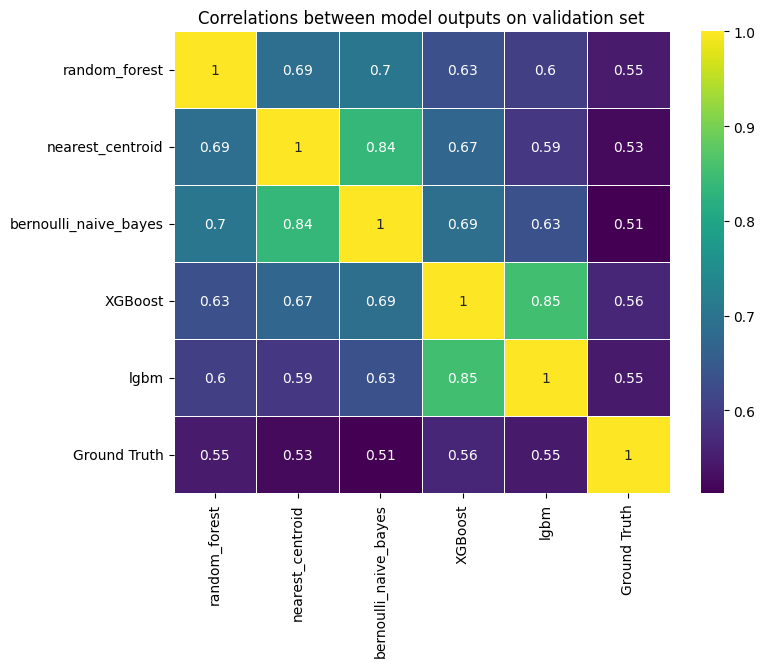

In [191]:
val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)
val_preds_df['Ground Truth'] = y_valid

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(val_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on validation set")
plt.show()

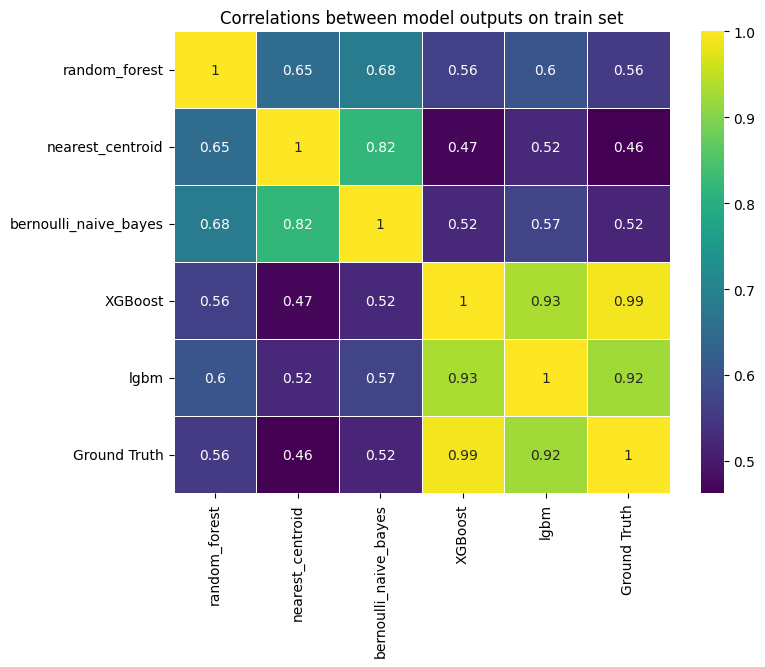

In [192]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)
train_preds_df['Ground Truth'] = y_train

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(train_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on train set")
plt.show()

### Voting Classifier

In [193]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=[3, 2, 1, 1,1])
voting_classifier.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

#### Optimising Voting Classifier Weights 

In [202]:
def objective(trial):
    # Define the range for each weight to optimize
    weights = [trial.suggest_float(f'weight_{i}', 0.1, 10.0) for i in range(len(estimators))]
    
    # Create the VotingClassifier with the suggested weights
    voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=weights)
    voting_classifier.fit(X_train, y_train)

    # Calculate F1 score on the validation set
    valid_preds = voting_classifier.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
    
    return valid_f1_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best weights found by Optuna
best_weights = study.best_params
print("Best Weights:", best_weights)

best_weights = [best_weights[f'weight_{i}'] for i in range(len(estimators))]

voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=best_weights)
voting_classifier.fit(X_train, y_train)

# Evaluate the model on both training and validation sets
train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')

valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

[I 2024-04-14 17:41:17,056] A new study created in memory with name: no-name-fdd69c95-fe91-4394-8b14-3226f6125e1e
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:17,348] Trial 0 finished with value: 0.7327935222672065 and parameters: {'weight_0': 9.500193476713047, 'weight_1': 8.633338881964097, 'weight_2': 1.7907571280232597, 'weight_3': 5.157929583492297, 'weight_4': 6.337237621173031}. Best is trial 0 with value: 0.7327935222672065.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:17,663] Trial 1 finished with value: 0.728744939271255 and parameters: {'weight_0': 1.4373383208990522, 'weight_1': 1.1429859700099596, 'weight_2': 8.121464492598939, 'weight_3': 8.874672351225493, 'weight_4': 9.683478933773031}. Best is trial 0 with value: 0.7327935222672065.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:18,129] Trial 2 finished with value: 0.728744939271255 and parameters: {'weight_0': 4.084474856059386, 'weight_1': 0.25558684612751903, 'weight_2': 4.155946398584518, 'weight_3': 7.8671888816389925, 'weight_4': 9.57829298341643}. Best is trial 0 with value: 0.7327935222672065.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:18,420] Trial 3 finished with value: 0.7327935222672065 and parameters: {'weight_0': 1.2624739456925318, 'weight_1': 1.5605522509433647, 'weight_2': 0.9868458040882151, 'weight_3': 9.63535772169985, 'weight_4': 4.732515775505371}. Best is trial 0 with value: 0.7327935222672065.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:18,709] Trial 4 finished with value: 0.7368421052631579 and parameters: {'weight_0': 7.779884276053546, 'weight_1': 1.934993041978116, 'weight_2': 4.026374290672701, 'weight_3': 6.4140647582981964, 'weight_4': 5.251106312184721}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:19,042] Trial 5 finished with value: 0.7327935222672065 and parameters: {'weight_0': 7.254430212867323, 'weight_1': 7.426664395250528, 'weight_2': 9.687565874424264, 'weight_3': 5.418097514895567, 'weight_4': 5.940387691929778}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:19,304] Trial 6 finished with value: 0.7368421052631579 and parameters: {'weight_0': 1.488953240832245, 'weight_1': 2.614011746847348, 'weight_2': 2.6541665764298017, 'weight_3': 3.6115513092908276, 'weight_4': 2.6166381397532845}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:19,578] Trial 7 finished with value: 0.6761133603238867 and parameters: {'weight_0': 1.400833207967009, 'weight_1': 2.158599185946715, 'weight_2': 9.160033755564083, 'weight_3': 0.7142036361621449, 'weight_4': 6.356603706695508}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:19,941] Trial 8 finished with value: 0.7327935222672065 and parameters: {'weight_0': 8.142298612354807, 'weight_1': 1.9006028514701458, 'weight_2': 2.3555428246363928, 'weight_3': 3.4913548276065933, 'weight_4': 0.7099072035741028}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:20,395] Trial 9 finished with value: 0.7206477732793523 and parameters: {'weight_0': 4.498298471209516, 'weight_1': 1.8076047137190194, 'weight_2': 1.5350706453483538, 'weight_3': 8.889275167564671, 'weight_4': 4.338471980515871}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:20,692] Trial 10 finished with value: 0.7368421052631579 and parameters: {'weight_0': 6.75051468777311, 'weight_1': 4.761604751985644, 'weight_2': 6.2177679750533095, 'weight_3': 6.86971693755597, 'weight_4': 8.037547284387145}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:20,996] Trial 11 finished with value: 0.7327935222672065 and parameters: {'weight_0': 3.34148357192705, 'weight_1': 4.080226228652191, 'weight_2': 3.9681441371685073, 'weight_3': 3.2096841227999846, 'weight_4': 2.255497342011605}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:21,285] Trial 12 finished with value: 0.728744939271255 and parameters: {'weight_0': 5.960610529258521, 'weight_1': 3.503787215470363, 'weight_2': 5.729609320076463, 'weight_3': 2.966836539158286, 'weight_4': 3.376333403782127}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:21,586] Trial 13 finished with value: 0.7327935222672065 and parameters: {'weight_0': 9.826005756808582, 'weight_1': 3.2377290460832286, 'weight_2': 3.328609904860465, 'weight_3': 6.3256055340331, 'weight_4': 2.1024286311288236}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:21,877] Trial 14 finished with value: 0.6720647773279352 and parameters: {'weight_0': 0.14435413917143847, 'weight_1': 5.82410945024512, 'weight_2': 0.1221805708175201, 'weight_3': 1.6566967526447, 'weight_4': 0.6427718165320777}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:22,284] Trial 15 finished with value: 0.6923076923076923 and parameters: {'weight_0': 2.7176128775815394, 'weight_1': 6.473572806205993, 'weight_2': 5.105557563243359, 'weight_3': 4.494291542411229, 'weight_4': 3.298618517654406}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:22,587] Trial 16 finished with value: 0.728744939271255 and parameters: {'weight_0': 5.4119571943621745, 'weight_1': 0.1884651313039658, 'weight_2': 2.8084084190028116, 'weight_3': 7.2746581986994805, 'weight_4': 8.074514113511094}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:22,918] Trial 17 finished with value: 0.728744939271255 and parameters: {'weight_0': 8.572475665760695, 'weight_1': 2.9261747647939504, 'weight_2': 6.9046453447128835, 'weight_3': 2.0257457517213244, 'weight_4': 2.1496584149070967}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:23,309] Trial 18 finished with value: 0.7327935222672065 and parameters: {'weight_0': 6.459561255983036, 'weight_1': 4.840631343997163, 'weight_2': 4.371483049392949, 'weight_3': 4.539081567494354, 'weight_4': 3.4308763689171586}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:23,653] Trial 19 finished with value: 0.7368421052631579 and parameters: {'weight_0': 7.697714902350005, 'weight_1': 2.6477329361054327, 'weight_2': 3.1921108734881645, 'weight_3': 5.548487841976107, 'weight_4': 5.506208360005084}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:24,016] Trial 20 finished with value: 0.7327935222672065 and parameters: {'weight_0': 2.7230121179568263, 'weight_1': 3.8294105258036666, 'weight_2': 7.224689590804386, 'weight_3': 6.204221998749218, 'weight_4': 7.001840964005059}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:24,352] Trial 21 finished with value: 0.7368421052631579 and parameters: {'weight_0': 6.799520492541357, 'weight_1': 4.996571677166118, 'weight_2': 5.65119514592233, 'weight_3': 7.187123776189635, 'weight_4': 7.596086075466719}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:24,906] Trial 22 finished with value: 0.7368421052631579 and parameters: {'weight_0': 8.720070348009557, 'weight_1': 4.263644075999793, 'weight_2': 6.485178020550202, 'weight_3': 6.39635316411444, 'weight_4': 8.022794963653508}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:25,279] Trial 23 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.905374085848448, 'weight_1': 5.940056616820557, 'weight_2': 5.033140830105106, 'weight_3': 4.27217193157375, 'weight_4': 8.584376579972348}. Best is trial 4 with value: 0.7368421052631579.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:25,616] Trial 24 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.260900886434754, 'weight_1': 0.8336073722159949, 'weight_2': 7.686927704372009, 'weight_3': 7.942531857476828, 'weight_4': 4.381915340477364}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:25,928] Trial 25 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.870671936907691, 'weight_1': 0.9815506287009752, 'weight_2': 8.055735921168393, 'weight_3': 8.198432449038938, 'weight_4': 4.17228242632209}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:26,252] Trial 26 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.964593698564193, 'weight_1': 0.8986234659704525, 'weight_2': 8.060920224249237, 'weight_3': 8.68684263562968, 'weight_4': 4.438959092684208}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:26,699] Trial 27 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.725648626911263, 'weight_1': 1.0770411646188744, 'weight_2': 8.088361293240812, 'weight_3': 8.231955012021164, 'weight_4': 4.165884255181711}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:27,047] Trial 28 finished with value: 0.7327935222672065 and parameters: {'weight_0': 3.7241337366817726, 'weight_1': 0.7361334616452171, 'weight_2': 8.263076264834378, 'weight_3': 9.884157768747832, 'weight_4': 4.281051633709537}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:27,360] Trial 29 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.409508544852408, 'weight_1': 0.8308619942031217, 'weight_2': 8.926309307995043, 'weight_3': 8.452881843022007, 'weight_4': 6.429630020503039}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:27,683] Trial 30 finished with value: 0.7246963562753036 and parameters: {'weight_0': 5.031833167015853, 'weight_1': 9.959329755908986, 'weight_2': 7.255569598043152, 'weight_3': 9.257605637241321, 'weight_4': 4.986374288633766}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:28,031] Trial 31 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.426838397453656, 'weight_1': 1.1927897434763097, 'weight_2': 8.053857398974982, 'weight_3': 8.02934542196885, 'weight_4': 3.9724490314280096}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:28,530] Trial 32 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.864429366022155, 'weight_1': 0.11311640939598055, 'weight_2': 7.785671668159358, 'weight_3': 7.808691653694094, 'weight_4': 3.7371102914480754}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:28,845] Trial 33 finished with value: 0.7408906882591093 and parameters: {'weight_0': 3.307849509293926, 'weight_1': 0.8407778497506204, 'weight_2': 8.767159064987828, 'weight_3': 8.620901298790335, 'weight_4': 2.7851596925109248}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:29,136] Trial 34 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.7604065530238815, 'weight_1': 1.2973881865704118, 'weight_2': 9.959934097189656, 'weight_3': 9.274446532676421, 'weight_4': 4.625372404607589}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:29,454] Trial 35 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.2613790344068425, 'weight_1': 0.6572916705005944, 'weight_2': 7.629895965214658, 'weight_3': 7.906876483016457, 'weight_4': 1.3070140976952813}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:29,786] Trial 36 finished with value: 0.7408906882591093 and parameters: {'weight_0': 3.8723752376486704, 'weight_1': 2.3031931096615326, 'weight_2': 8.472074067760666, 'weight_3': 8.367958255297037, 'weight_4': 5.42962858312874}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:30,251] Trial 37 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.820552149201666, 'weight_1': 1.4035614144979536, 'weight_2': 9.211797824592418, 'weight_3': 9.462232709187662, 'weight_4': 5.955412515353059}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:30,582] Trial 38 finished with value: 0.7368421052631579 and parameters: {'weight_0': 6.241452825226035, 'weight_1': 1.6512616302572993, 'weight_2': 6.703727488400665, 'weight_3': 7.487797289250659, 'weight_4': 2.855358536974527}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:30,911] Trial 39 finished with value: 0.7327935222672065 and parameters: {'weight_0': 2.5473225298749154, 'weight_1': 0.5389822117961316, 'weight_2': 7.503336400590251, 'weight_3': 9.995580791518055, 'weight_4': 5.100787261352007}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:31,231] Trial 40 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.455237372722442, 'weight_1': 2.3270978490480387, 'weight_2': 9.56107332324134, 'weight_3': 8.995816245480452, 'weight_4': 4.4743952174329}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:31,541] Trial 41 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.4080384180859875, 'weight_1': 1.1806183926766634, 'weight_2': 8.198944888981442, 'weight_3': 8.153792930532452, 'weight_4': 3.9537774439743965}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:31,935] Trial 42 finished with value: 0.7368421052631579 and parameters: {'weight_0': 3.482028533799241, 'weight_1': 1.3327908258460228, 'weight_2': 7.997610702991522, 'weight_3': 6.9185159086515995, 'weight_4': 3.9133080701967455}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:32,254] Trial 43 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.745491912858221, 'weight_1': 1.8892039014763577, 'weight_2': 8.663090269634905, 'weight_3': 7.760770808329821, 'weight_4': 5.794614665807404}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:32,583] Trial 44 finished with value: 0.728744939271255 and parameters: {'weight_0': 4.048079183592786, 'weight_1': 7.760771338092542, 'weight_2': 6.123144678794088, 'weight_3': 8.775603043735371, 'weight_4': 4.804738493740827}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:32,942] Trial 45 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.303138989473138, 'weight_1': 1.0172090669124962, 'weight_2': 9.264513863938882, 'weight_3': 8.300856780466495, 'weight_4': 4.0865411429468}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:33,239] Trial 46 finished with value: 0.728744939271255 and parameters: {'weight_0': 1.987380715947316, 'weight_1': 0.44684545711890955, 'weight_2': 7.079084883680974, 'weight_3': 6.841489724020002, 'weight_4': 3.066952333672325}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:33,644] Trial 47 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.265426836460579, 'weight_1': 2.8486416332519173, 'weight_2': 7.942453134988088, 'weight_3': 5.896899373997884, 'weight_4': 3.637040024041919}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:33,919] Trial 48 finished with value: 0.7368421052631579 and parameters: {'weight_0': 3.077823874768346, 'weight_1': 2.0038972057217324, 'weight_2': 8.592800242431034, 'weight_3': 7.496397129357518, 'weight_4': 1.4730458917979519}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:34,247] Trial 49 finished with value: 0.7368421052631579 and parameters: {'weight_0': 7.162348399879069, 'weight_1': 1.5356916703815449, 'weight_2': 7.442273075547084, 'weight_3': 8.994931406225062, 'weight_4': 2.4238875615231903}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:34,534] Trial 50 finished with value: 0.7327935222672065 and parameters: {'weight_0': 4.596184572323895, 'weight_1': 0.21515041288857462, 'weight_2': 9.585339253508307, 'weight_3': 8.03828555514147, 'weight_4': 4.504057922367798}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:34,956] Trial 51 finished with value: 0.7408906882591093 and parameters: {'weight_0': 3.3691015008328122, 'weight_1': 1.0528845090107033, 'weight_2': 8.872176667686677, 'weight_3': 8.613855852053126, 'weight_4': 2.916095258209181}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:35,246] Trial 52 finished with value: 0.7408906882591093 and parameters: {'weight_0': 3.804875604459211, 'weight_1': 0.8656867991468227, 'weight_2': 8.269114584341054, 'weight_3': 9.58366701754545, 'weight_4': 3.171348976319089}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:35,531] Trial 53 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.045121228023342, 'weight_1': 1.7187232113221773, 'weight_2': 8.998287258668139, 'weight_3': 8.749813463437285, 'weight_4': 1.891474526995724}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:35,841] Trial 54 finished with value: 0.7408906882591093 and parameters: {'weight_0': 2.3352295394029157, 'weight_1': 2.3477022285262343, 'weight_2': 7.805767105094588, 'weight_3': 7.700774403361863, 'weight_4': 2.6610329316013543}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:36,269] Trial 55 finished with value: 0.6761133603238867 and parameters: {'weight_0': 3.047179880505719, 'weight_1': 0.5838228089681685, 'weight_2': 6.632512702828636, 'weight_3': 0.16233274424603383, 'weight_4': 3.710414604875707}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:36,550] Trial 56 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.686338222904029, 'weight_1': 3.0745337664899046, 'weight_2': 9.989945754386492, 'weight_3': 7.096434590555187, 'weight_4': 4.891179827448245}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:36,888] Trial 57 finished with value: 0.7368421052631579 and parameters: {'weight_0': 6.292463942453159, 'weight_1': 1.0505665041083376, 'weight_2': 8.69732811670572, 'weight_3': 6.757544310958229, 'weight_4': 4.232522236578043}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:37,204] Trial 58 finished with value: 0.7246963562753036 and parameters: {'weight_0': 0.8921928211518066, 'weight_1': 3.4213515176738207, 'weight_2': 6.086114630545326, 'weight_3': 8.290596136021676, 'weight_4': 3.506705298231813}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:37,575] Trial 59 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.457961945478408, 'weight_1': 0.42550855409254246, 'weight_2': 9.433286917875419, 'weight_3': 9.106394748986556, 'weight_4': 5.123298632856984}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:37,874] Trial 60 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.225573323296028, 'weight_1': 2.5814634067385027, 'weight_2': 8.461347340431246, 'weight_3': 9.662992757535, 'weight_4': 5.624022274006438}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:38,172] Trial 61 finished with value: 0.728744939271255 and parameters: {'weight_0': 3.910971109468321, 'weight_1': 1.945014712045189, 'weight_2': 8.323789832162227, 'weight_3': 8.427552047491494, 'weight_4': 6.2304031041768475}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:38,470] Trial 62 finished with value: 0.7327935222672065 and parameters: {'weight_0': 3.737693599076789, 'weight_1': 1.4535331981395874, 'weight_2': 7.984083060364496, 'weight_3': 8.626494251847873, 'weight_4': 5.385635018053513}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:38,856] Trial 63 finished with value: 0.728744939271255 and parameters: {'weight_0': 4.20546669776561, 'weight_1': 0.8695242029746881, 'weight_2': 7.077361987543256, 'weight_3': 7.998822546145847, 'weight_4': 6.725888523846283}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:39,152] Trial 64 finished with value: 0.7408906882591093 and parameters: {'weight_0': 3.0228754575140333, 'weight_1': 2.2066497709924864, 'weight_2': 7.478365589537961, 'weight_3': 7.492601079729547, 'weight_4': 4.726980013051111}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:39,444] Trial 65 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.701645534660831, 'weight_1': 1.6388465826679117, 'weight_2': 8.770376997041897, 'weight_3': 9.338225452326412, 'weight_4': 4.208785704381895}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:39,732] Trial 66 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.693429911301948, 'weight_1': 0.1144938283554674, 'weight_2': 9.166023194065037, 'weight_3': 8.343342944212107, 'weight_4': 3.2318083599917258}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:40,171] Trial 67 finished with value: 0.6923076923076923 and parameters: {'weight_0': 3.5584437060019085, 'weight_1': 1.1951862404726628, 'weight_2': 8.396650510645232, 'weight_3': 4.926539743440598, 'weight_4': 0.1546533353051336}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:40,537] Trial 68 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.066379749936827, 'weight_1': 0.5439702801581636, 'weight_2': 6.902298228348597, 'weight_3': 6.564287846136908, 'weight_4': 5.285756533842744}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:40,949] Trial 69 finished with value: 0.728744939271255 and parameters: {'weight_0': 2.0752568863836816, 'weight_1': 0.761376098238556, 'weight_2': 7.650012525739202, 'weight_3': 7.367085716525658, 'weight_4': 3.872921577278457}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:41,350] Trial 70 finished with value: 0.7408906882591093 and parameters: {'weight_0': 6.105819539216553, 'weight_1': 5.679099933981856, 'weight_2': 8.069425979040593, 'weight_3': 8.712129653299277, 'weight_4': 4.483861019384442}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:41,898] Trial 71 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.828240645698829, 'weight_1': 1.3684240638033454, 'weight_2': 9.142351298353168, 'weight_3': 9.489856131853147, 'weight_4': 5.808590122206002}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:42,217] Trial 72 finished with value: 0.728744939271255 and parameters: {'weight_0': 4.132593704196656, 'weight_1': 1.5149018284093767, 'weight_2': 9.323918030782155, 'weight_3': 9.76908804467258, 'weight_4': 6.191163271655284}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:42,507] Trial 73 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.55121946280962, 'weight_1': 2.42456694833309, 'weight_2': 9.777634373298266, 'weight_3': 9.310450408094118, 'weight_4': 7.01241031820356}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:42,830] Trial 74 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.459975645009464, 'weight_1': 2.0682586948360027, 'weight_2': 8.58575098128557, 'weight_3': 8.867662418835806, 'weight_4': 5.53894094579771}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:43,261] Trial 75 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.860915553579543, 'weight_1': 1.270321923854707, 'weight_2': 8.990371011890662, 'weight_3': 8.103331984258235, 'weight_4': 5.086384907305485}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:43,563] Trial 76 finished with value: 0.7246963562753036 and parameters: {'weight_0': 6.614553441562733, 'weight_1': 0.39927783077954015, 'weight_2': 7.770593279812461, 'weight_3': 7.706358430195521, 'weight_4': 9.87823529466526}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:43,871] Trial 77 finished with value: 0.728744939271255 and parameters: {'weight_0': 3.910368555921954, 'weight_1': 0.8527102949807871, 'weight_2': 8.173117579566158, 'weight_3': 9.117276243952396, 'weight_4': 5.9370813271778315}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:44,260] Trial 78 finished with value: 0.7327935222672065 and parameters: {'weight_0': 3.251560606119497, 'weight_1': 1.80660639076008, 'weight_2': 7.360161256442056, 'weight_3': 8.494361493844483, 'weight_4': 4.022193244574581}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:44,782] Trial 79 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.362737809519718, 'weight_1': 4.4552454658905685, 'weight_2': 8.546405832393361, 'weight_3': 6.023465544751197, 'weight_4': 3.551274750042685}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:45,145] Trial 80 finished with value: 0.728744939271255 and parameters: {'weight_0': 5.212482484901732, 'weight_1': 1.0711639233521435, 'weight_2': 1.0716784218857258, 'weight_3': 8.140562792567007, 'weight_4': 4.608384768392982}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:45,574] Trial 81 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.5374241083760385, 'weight_1': 2.773582822224878, 'weight_2': 9.467935656758579, 'weight_3': 9.032737940519617, 'weight_4': 4.387756766338638}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:45,876] Trial 82 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.924680547323686, 'weight_1': 2.200087258660453, 'weight_2': 9.72879336994417, 'weight_3': 9.48166903183945, 'weight_4': 4.988609006004083}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:46,284] Trial 83 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.955466177693395, 'weight_1': 1.6825445035801574, 'weight_2': 8.96248754981131, 'weight_3': 8.93212226112993, 'weight_4': 4.7820780611536735}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:46,716] Trial 84 finished with value: 0.7206477732793523 and parameters: {'weight_0': 4.577568192723777, 'weight_1': 0.35462614335782394, 'weight_2': 9.611140093214946, 'weight_3': 2.4268366876085845, 'weight_4': 4.358945022235931}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:47,065] Trial 85 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.132367945732378, 'weight_1': 3.8123431590726744, 'weight_2': 8.766894448049682, 'weight_3': 8.56008725233568, 'weight_4': 5.253512686429646}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:47,464] Trial 86 finished with value: 0.7368421052631579 and parameters: {'weight_0': 5.56304345556838, 'weight_1': 1.3571749351578808, 'weight_2': 7.893156736653529, 'weight_3': 7.867572789594678, 'weight_4': 4.094835687039221}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:47,807] Trial 87 finished with value: 0.7327935222672065 and parameters: {'weight_0': 4.036635621326611, 'weight_1': 0.691128652791707, 'weight_2': 5.3197154563402655, 'weight_3': 7.217938173960144, 'weight_4': 3.8068406934310715}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:48,129] Trial 88 finished with value: 0.728744939271255 and parameters: {'weight_0': 3.6248264738916056, 'weight_1': 9.67350264898294, 'weight_2': 4.290938997771005, 'weight_3': 8.28110914801071, 'weight_4': 6.635187539410457}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:48,552] Trial 89 finished with value: 0.728744939271255 and parameters: {'weight_0': 2.7777874171402956, 'weight_1': 2.485788330472044, 'weight_2': 9.168208389382778, 'weight_3': 7.610463145099378, 'weight_4': 9.050646537795698}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:48,879] Trial 90 finished with value: 0.7246963562753036 and parameters: {'weight_0': 5.3083617528062135, 'weight_1': 0.9969817516625482, 'weight_2': 2.1949589099628577, 'weight_3': 9.838009865303253, 'weight_4': 1.7909665699770976}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:49,216] Trial 91 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.360056973591835, 'weight_1': 1.2493039370889085, 'weight_2': 8.278968595926793, 'weight_3': 8.181665809991447, 'weight_4': 2.7153786503230415}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:49,618] Trial 92 finished with value: 0.7368421052631579 and parameters: {'weight_0': 4.7174176433095685, 'weight_1': 0.6617199025465246, 'weight_2': 8.216115464310064, 'weight_3': 8.831825260762749, 'weight_4': 2.9992539087498855}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:49,996] Trial 93 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.445904739004337, 'weight_1': 1.8932334867998537, 'weight_2': 7.648025356183659, 'weight_3': 7.916892751449226, 'weight_4': 3.4603869969268737}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:50,328] Trial 94 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.062774867000841, 'weight_1': 6.959086519348162, 'weight_2': 8.450513914052841, 'weight_3': 9.148028499003637, 'weight_4': 3.984351739419325}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:50,746] Trial 95 finished with value: 0.7408906882591093 and parameters: {'weight_0': 5.892686694635163, 'weight_1': 1.509591406292735, 'weight_2': 7.1668608002108725, 'weight_3': 8.514413533686922, 'weight_4': 4.526810436972422}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:51,113] Trial 96 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.819418960327009, 'weight_1': 1.1227112875410457, 'weight_2': 8.055900535116763, 'weight_3': 9.402165945746916, 'weight_4': 2.4736206999236625}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:51,430] Trial 97 finished with value: 0.7327935222672065 and parameters: {'weight_0': 5.0680682631367295, 'weight_1': 0.30337424674549507, 'weight_2': 3.8492703464349907, 'weight_3': 7.098629967513087, 'weight_4': 4.838103210054341}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:51,895] Trial 98 finished with value: 0.728744939271255 and parameters: {'weight_0': 3.45176157599146, 'weight_1': 0.9163795342113197, 'weight_2': 8.857668728176234, 'weight_3': 8.622735440180923, 'weight_4': 5.635592977945745}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
[I 2024-04-14 17:41:52,194] Trial 99 finished with value: 0.7408906882591093 and parameters: {'weight_0': 4.242241684948043, 'weight_1': 3.0058269007477585, 'weight_2': 9.30709841295182, 'weight_3': 7.947461417211226, 'weight_4': 3.3319236722275183}. Best is trial 24 with value: 0.7408906882591093.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [ ]:
# Generate Voting Classifier CSV
test_preds = voting_classifier.predict(X_test)

PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

submission_df.to_csv("submissions/Without_Ordinal_Encoding/VotingClassifier_Ensemble_3_RandomForest_5_4_NearestCentroid_NaiveBayes_XGBoost_LGBM_Submission.csv", index=False)

### Stacking Classifier

In [194]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 57
[LightGBM] [Info] Start training from score -1.084542
[LightGBM] [Info] Start training from score -1.592378
[LightGBM] [Info] Start training from score -0.779791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
c:\Users\kp27d\anaconda3\envs\MachineLearningProject\lib\site-packages\sklearn\neighbors\_nearest_centroid.py:201: UserWarning: Averaging for metrics other th

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 790, number of used features: 57
[LightGBM] [Info] Start training from score -1.084784
[LightGBM] [Info] Start training from score -1.590629
[LightGBM] [Info] Start training from score -0.780389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

### Custom Ensemble using Decision Tree & Some inputs columns

In [195]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)

val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)

test_preds_df = pd.DataFrame()
for name, model in estimators:
    test_preds_df[name] = model.predict(X_test)

train_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/train_processed.csv")
valid_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/valid_processed.csv")
test_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/test_processed.csv")

FEATURE_NAMES_TO_ADD = ['total_protein', 'nasogastric_reflux_ph', 'packed_cell_volume', 'abdomo_protein', 'respiratory_rate', 'pain_is_extreme_pain']
for feature in FEATURE_NAMES_TO_ADD:
    train_preds_df[feature] = train_df[feature]
    val_preds_df[feature] = valid_df[feature]
    test_preds_df[feature] = test_df[feature]

X_train_with_preds = train_preds_df.to_numpy()
X_valid_with_preds = val_preds_df.to_numpy()
X_test_with_preds = test_preds_df.to_numpy()

print(f"X_train_with_preds shape: {X_train_with_preds.shape}\nX_valid_with_preds shape: {X_valid_with_preds.shape}\nX_test_with_preds shape: {X_test_with_preds.shape}")

X_train_with_preds shape: (988, 11)
X_valid_with_preds shape: (247, 11)
X_test_with_preds shape: (824, 11)


In [196]:
from sklearn.tree import DecisionTreeClassifier

final_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3, splitter='best')
final_classifier.fit(X_train_with_preds, y_train)

train_preds = final_classifier.predict(X_train_with_preds)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = final_classifier.predict(X_valid_with_preds)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.9959514170040485
Valid F1 Score: 0.7327935222672065


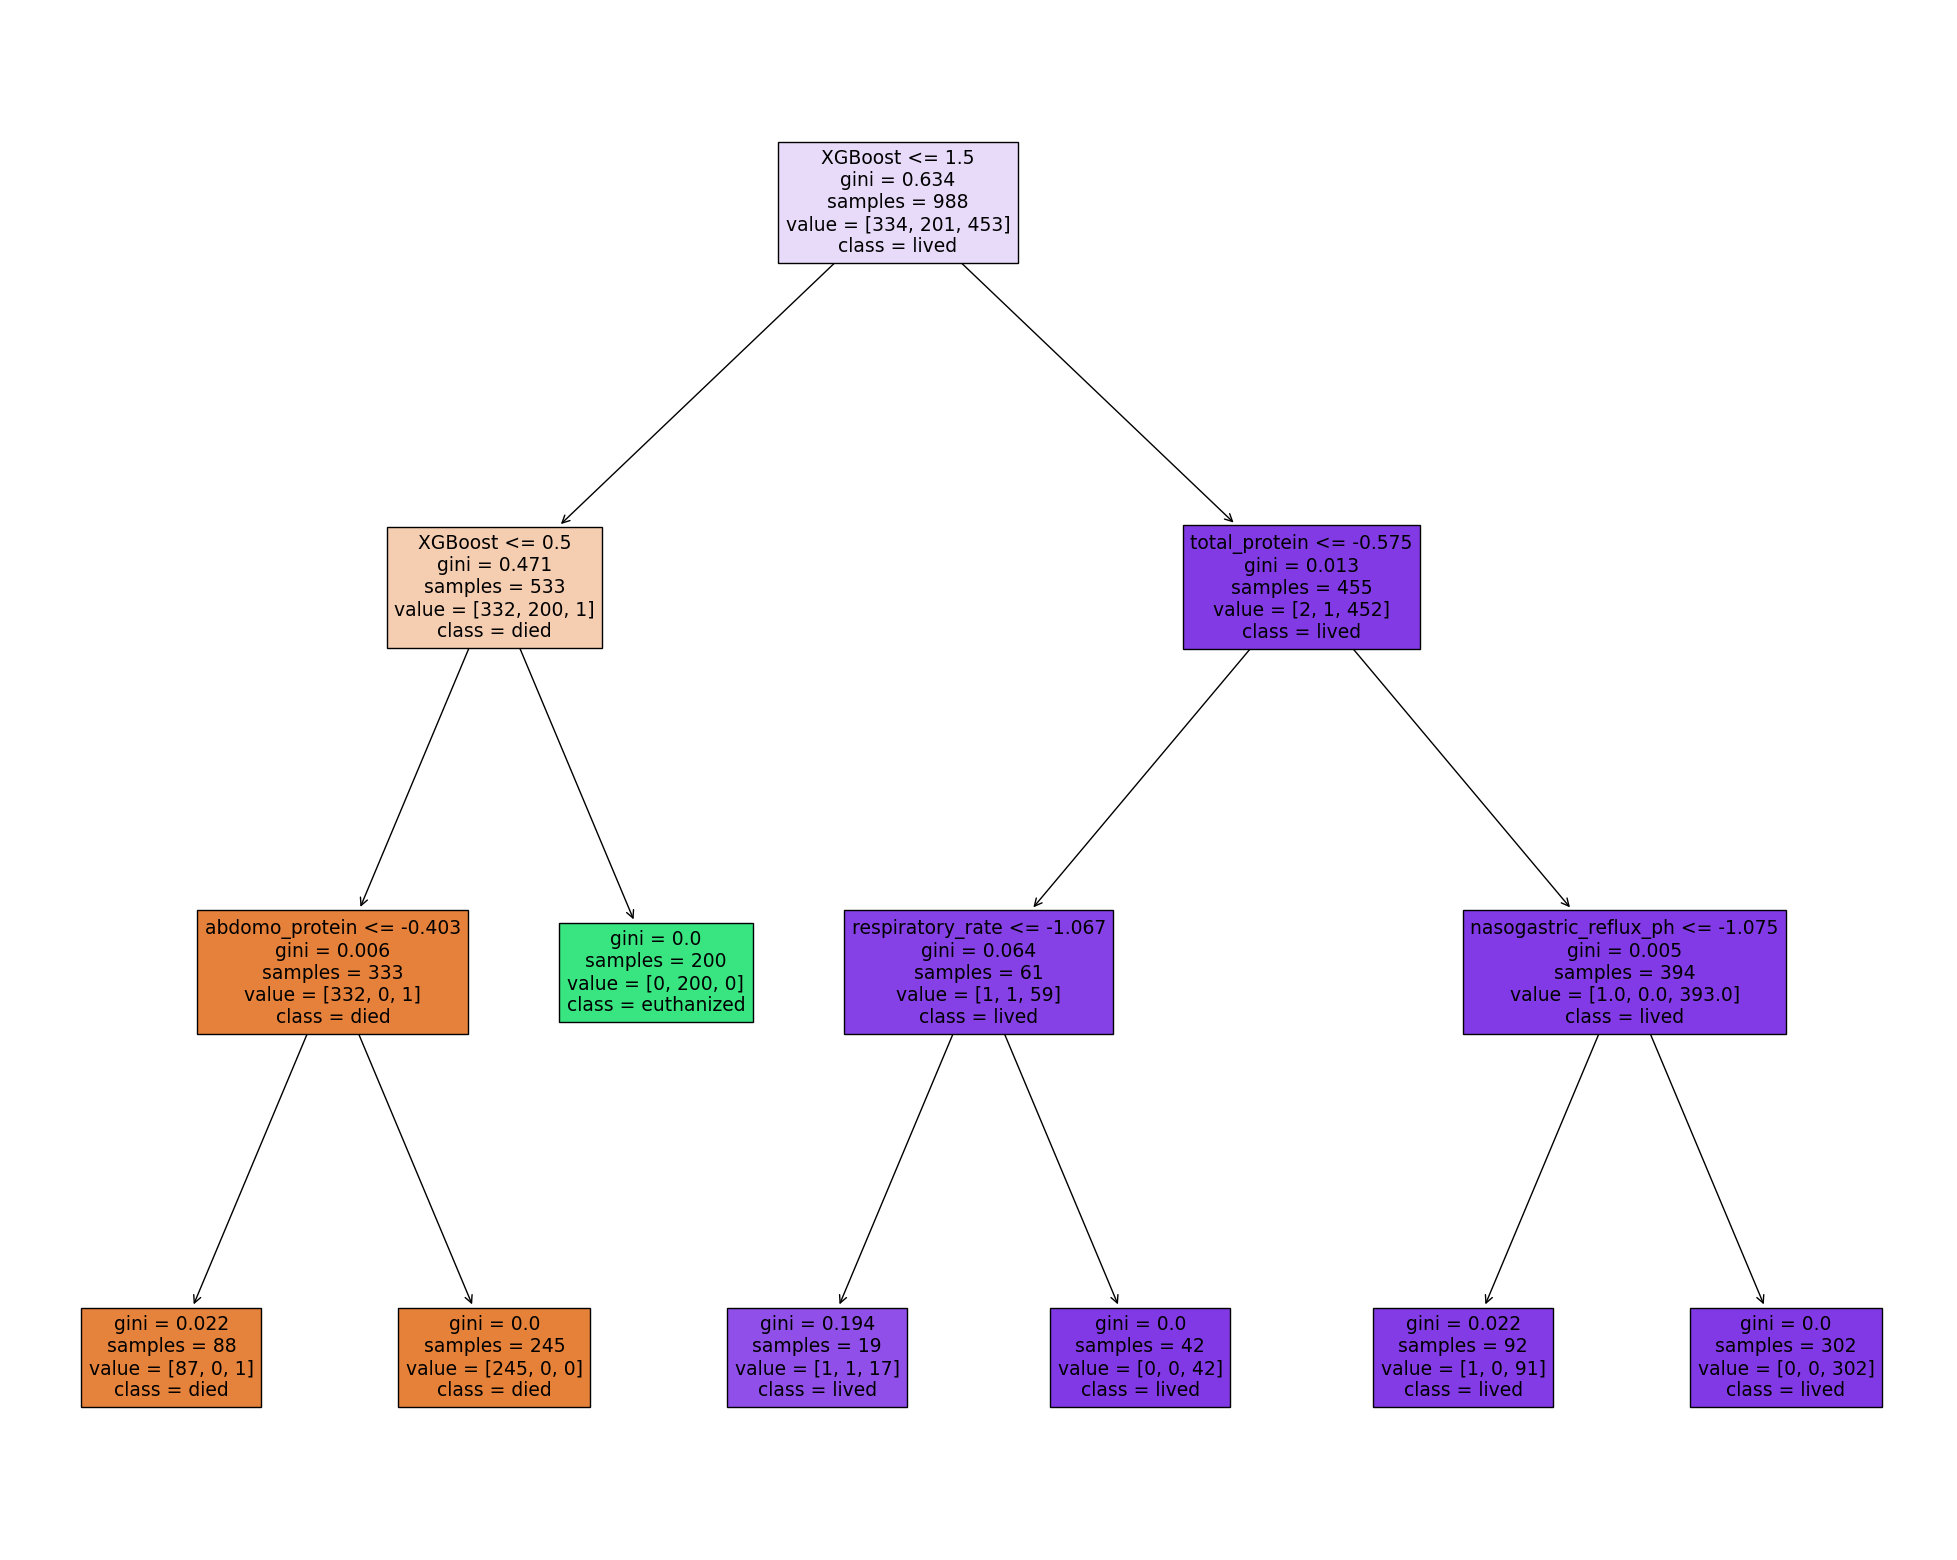

In [197]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_classifier, 
                   feature_names=list(train_preds_df.columns),  
                   class_names=['died', 'euthanized', 'lived'],
                   filled=True)

In [198]:
test_preds = final_classifier.predict(X_test_with_preds)

In [199]:
PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

In [200]:
submission_df.to_csv("submissions/Without_Ordinal_Encoding/DecisionTree_Ensemble_3_RandomForest_5_4_NearestCentroid_NaiveBayes_XGBoost_LGBM_Submission.csv", index=False)